In [4]:
from torchfsm.operator import Laplacian,Operator,VorticityConvection
from typing import Optional

def NavierStokesVorticity(Re=100)->Operator:
    return -VorticityConvection() + 1/Re*Laplacian()

In [5]:
import torch
from torchfsm.mesh import MeshGrid
from torchfsm.plot import plot_traj
from torchfsm.field import kolm_force,diffused_noise
from torchfsm.traj_recorder import AutoRecorder,IntervalController
device='cuda' if torch.cuda.is_available() else 'cpu'
L=torch.pi*2; N=128; 

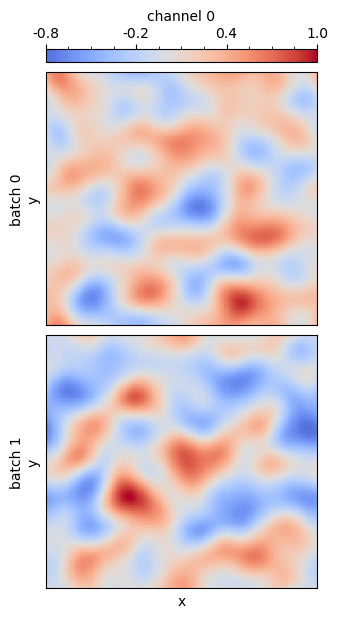

In [21]:
mesh=MeshGrid([(0,L,N),(0,L,N)],device=device)
x,y=mesh.bc_mesh_grid()
kolm=NavierStokesVorticity(Re=1000)
u0=diffused_noise(mesh,device=device,n_batch=2,
                  zero_centered=False,
                  unit_magnitude=True,
                  unit_variance=False,
                  diffusion_coef=0.05)
from torchfsm.plot import plot_field

plot_field(u0)

In [28]:
traj=kolm.integrate(
        u_0=u0,
        mesh=mesh,
        dt=0.1,
        step=100*50,
        trajectory_recorder=AutoRecorder(IntervalController(interval=50)),
        progressive=True
    )

Integrating:   0%|          | 0/5000 [00:00<?, ?it/s]

In [29]:
plot_traj(traj)